In [1]:
###########################################
########## LINEAR REG #################
#######################################

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv(r"/Users/ahsan/Dropbox/My Mac (Alnoors-MBP-2.hub)/Documents/OneDrive/Documents/UNSW DATA SCIENCE/Term 3 2020/Data3001 Data Science In Prac/combined_energy.csv",)

In [2]:
data = data[data["REGIONID"] != "TAS1"]
data = data[data["REGIONID"] != "SNOWY1"]

# Drop RRP & ROC because we will use RRP5min & ROP5min\
data.drop(["RRP", "ROP", "ROP5min", "DISPATCHINTERVAL", "APCFLAG"], axis = 1, inplace = True)

# BELOW WE FOUND THAT LOG PRICES ARE BETTER
data["logPrice"] = np.log(data["RRP5min"])

data["SETTLEMENTDATE"] = pd.to_datetime(data["SETTLEMENTDATE"])

# Seperating data for each region
region = ['NSW1', 'QLD1', 'SA1', 'TAS1', 'VIC1']
dataNSW = data[data["REGIONID"] == "NSW1"]
dataQLD = data[data["REGIONID"] == "QLD1"]
dataSA = data[data["REGIONID"] == "SA1"]
dataTAS = data[data["REGIONID"] == "TAS1"]
dataVIC = data[data["REGIONID"] == "VIC1"]
dataset = [dataNSW, dataQLD, dataSA, dataTAS, dataVIC]

########## SNOW1 is an unknown region entry. No such region exists. Only 1 row so we drop ##############

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
X = dataSA["TOTALDEMAND"]
Y = dataSA["RRP5min"]

In [4]:
dataSA.index = dataSA["SETTLEMENTDATE"]
dataSA.drop(columns="SETTLEMENTDATE", inplace=True)
dataSA.index = pd.to_datetime(dataSA.index)

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


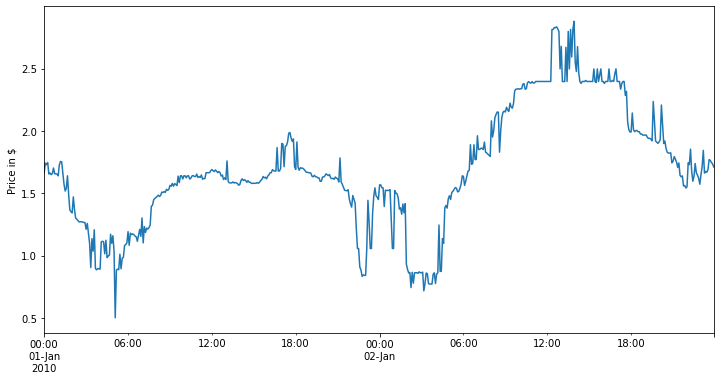

In [5]:
# Time series of Price in South Australia
# HIGH SEASONALITY AND VARIANCE. NO TREND
from matplotlib import dates
ax = dataSA["RRP5min"]["2010-01-01":"2010-01-02"].plot(figsize=(12,6))
ax.set(xlabel="", ylabel="Price in $");

In [6]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [7]:
###################################################
########### HODRICK PRESCOTT FILTER ###############
##################################################

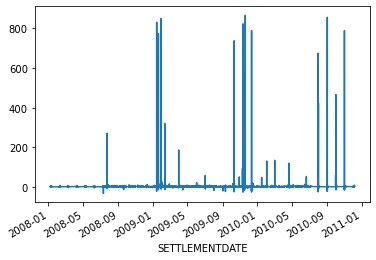

In [8]:
price_cycle, price_trend = hpfilter(dataSA["RRP5min"])
price_trend.plot()

In [9]:
############################################
########### ETS DECOMPOSITION ###############
#############################################

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
####### I need to forecast next 7 days Energy prices #######
#############################################################

In [12]:
dataSA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209715 entries, 2008-01-07 00:00:00 to 2010-06-29 04:10:00
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   REGIONID     209715 non-null  object 
 1   TOTALDEMAND  209715 non-null  float64
 2   RRP5min      209715 non-null  float64
 3   logPrice     208865 non-null  float64
dtypes: float64(3), object(1)
memory usage: 18.0+ MB


In [13]:
train_df = dataSA.iloc[:207700]
test_df = dataSA.iloc[207700:]

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [15]:
fitted_model = ExponentialSmoothing(train_df["RRP5min"],
                                    seasonal="add",
                                   seasonal_periods=12).fit()

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [16]:
test_pred = fitted_model.forecast(2015)

/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


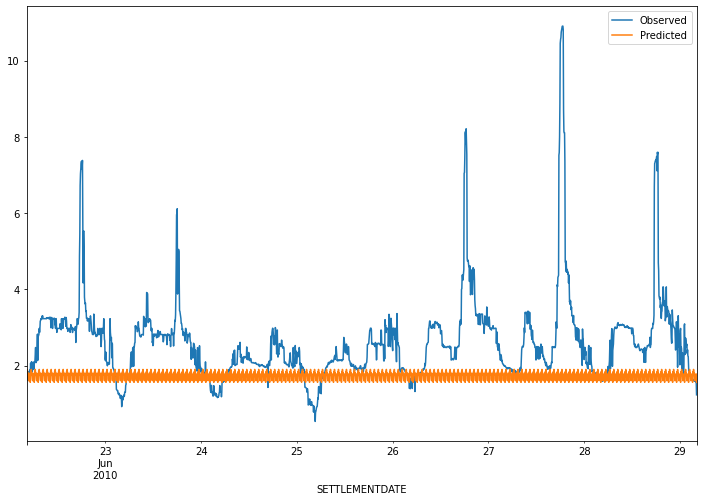

In [17]:
x = pd.DataFrame(test_pred, columns=["Price"])
x["Price"] = test_pred
x["SETTLEMENTDATE"] = test_df.index
x.index = x["SETTLEMENTDATE"]

test_df["RRP5min"].plot(legend=True, label="Observed", figsize=(12,8))
x["Price"].plot(legend=True, label="Predicted")

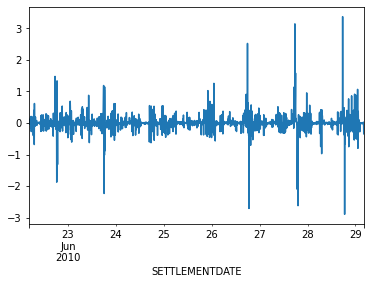

In [18]:
from statsmodels.tsa.statespace.tools import diff
diff(test_df["RRP5min"], k_diff=1).plot()

In [19]:
##############################
########### ACF & PACF ###########
#################################
import statsmodels.api as sm
from statsmodels.tsa.stattools import acovf, acf, pacf, pacf_yw, pacf_ols

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
acf(dataSA["RRP5min"])

array([1.        , 0.89236465, 0.84513454, 0.80476523, 0.77068926,
       0.74339703, 0.71279763, 0.67893489, 0.65861544, 0.62891241,
       0.60809358, 0.58138569, 0.55531845, 0.53273899, 0.50712996,
       0.48540192, 0.45936711, 0.43668227, 0.41237903, 0.39771182,
       0.37800039, 0.36034324, 0.34515528, 0.32830689, 0.31282834,
       0.2921025 , 0.27813263, 0.26155491, 0.24961453, 0.23325662,
       0.21940229, 0.21312646, 0.203697  , 0.19676989, 0.18961956,
       0.17851859, 0.17192082, 0.1613631 , 0.14932531, 0.13820694,
       0.13127752])

In [22]:
pacf_yw(dataSA["RRP5min"], nlags=12, method='unbiased')

array([ 1.        ,  0.89236891,  0.239694  ,  0.09102432,  0.05585522,
        0.0541193 ,  0.00713267, -0.02171377,  0.04998073, -0.0212635 ,
        0.023654  , -0.01797821, -0.0126948 ])

In [23]:
pacf_ols(dataSA["RRP5min"], nlags=12)

array([ 1.        ,  0.89236468,  0.23968284,  0.09101661,  0.05584957,
        0.05411375,  0.0071301 , -0.02171303,  0.04997676, -0.02126294,
        0.02365193, -0.01797711, -0.01269334])

In [24]:
####### PLOTTING ACF & PACF #########
from pandas.plotting import lag_plot

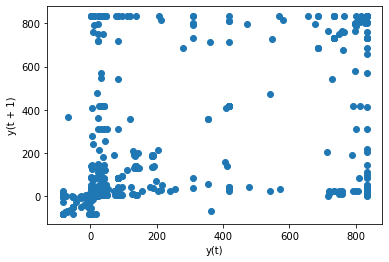

In [110]:
lag_plot(dataSA["RRP5min"])

In [111]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

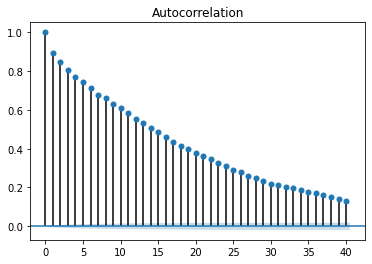

In [112]:
plot_acf(dataSA["RRP5min"], lags=40);

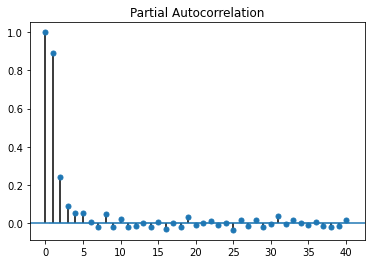

In [113]:
plot_pacf(dataSA["RRP5min"], lags=40);

In [21]:
################################
####### AR MODEL ##############
############################

In [22]:
from statsmodels.tsa.ar_model import AR, ARResults

In [23]:
len(dataSA)

209715

In [91]:
train = dataSA.iloc[:209000]
test = dataSA.iloc[209000:]

In [150]:
###### AR(1) #######
model = AR(train["RRP5min"])

In [151]:
AR1fit = model.fit(maxlags=2)

In [152]:
start = len(train)
end = len(train) + len(test) - 1

In [153]:
pred = AR1fit.predict(start=start, end=end)

In [142]:
X = pd.DataFrame(pred, columns=["Price"])
X["SETTLEMENTDATE"] = test.index
X.index = X["SETTLEMENTDATE"]
X.drop(columns="SETTLEMENTDATE", inplace=True)

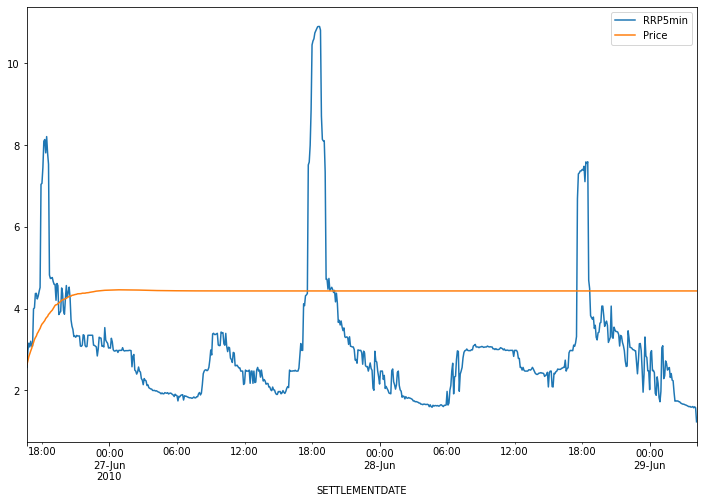

In [143]:
test["RRP5min"].plot(figsize=(12,8), legend=True)
X["Price"].plot(legend=True)

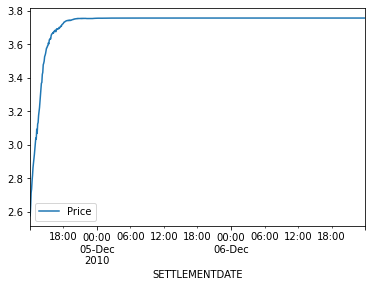

In [258]:
X.plot()

In [144]:
##### COMPARISION MATRIX
from sklearn.metrics import mean_squared_error

In [146]:
error = mean_squared_error(test["RRP5min"], X["Price"])

In [147]:
error

4.422323601377156

In [158]:
dataSA.index

DatetimeIndex(['2008-01-07 00:00:00', '2008-01-07 00:05:00',
               '2008-01-07 00:10:00', '2008-01-07 00:15:00',
               '2008-01-07 00:20:00', '2008-01-07 00:25:00',
               '2008-01-07 00:30:00', '2008-01-07 00:35:00',
               '2008-01-07 00:40:00', '2008-01-07 00:45:00',
               ...
               '2010-06-29 03:25:00', '2010-06-29 03:30:00',
               '2010-06-29 03:35:00', '2010-06-29 03:40:00',
               '2010-06-29 03:45:00', '2010-06-29 03:50:00',
               '2010-06-29 03:55:00', '2010-06-29 04:00:00',
               '2010-06-29 04:05:00', '2010-06-29 04:10:00'],
              dtype='datetime64[ns]', name='SETTLEMENTDATE', length=209715, freq=None)

In [25]:
new = dataSA
new = new.to_period("5T").resample('5T').ffill()
#new = dataSA.resample('5T').mean()

In [26]:
train = new.iloc[250000:306400]
test = new.iloc[306400:]

In [27]:
###### AR(1) #######
model = AR(train["RRP5min"])

NameError: name 'AR' is not defined

In [ ]:
AR1fit = model.fit(maxlags=2)

In [240]:
start = len(train)
end = len(train) + len(test) - 1

In [241]:
pred = AR1fit.predict(start=start, end=end)

In [242]:
X = pd.DataFrame(pred, columns=["Price"])
X["SETTLEMENTDATE"] = test.index
X.index = X["SETTLEMENTDATE"]
X.drop(columns="SETTLEMENTDATE", inplace=True)

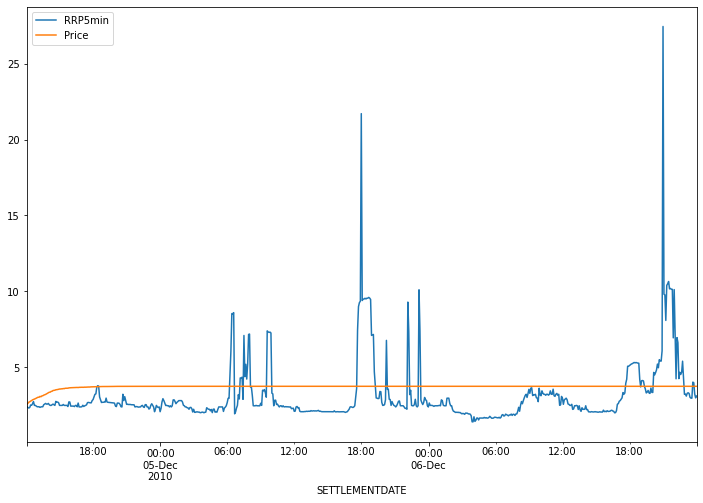

In [243]:
test["RRP5min"].plot(figsize=(12,8), legend=True)
X["Price"].plot(legend=True)

In [245]:
new.index

PeriodIndex(['2008-01-07 00:00', '2008-01-07 00:05', '2008-01-07 00:10',
             '2008-01-07 00:15', '2008-01-07 00:20', '2008-01-07 00:25',
             '2008-01-07 00:30', '2008-01-07 00:35', '2008-01-07 00:40',
             '2008-01-07 00:45',
             ...
             '2010-12-06 23:10', '2010-12-06 23:15', '2010-12-06 23:20',
             '2010-12-06 23:25', '2010-12-06 23:30', '2010-12-06 23:35',
             '2010-12-06 23:40', '2010-12-06 23:45', '2010-12-06 23:50',
             '2010-12-06 23:55'],
            dtype='period[5T]', name='SETTLEMENTDATE', length=306720, freq='5T')

In [252]:
error = mean_squared_error(test["RRP5min"], X["Price"])

In [253]:
error

4.514353237209842

In [255]:
##############################
######## ABOUT THE DATA ############
###############################

In [257]:
# To test the stationarity of the series, we use AUGMENTED DICKY FULLER TEST
# GRANGER casuality test. Hyp test whether one time series sig to observe other time series

In [259]:
from statsmodels.tsa.stattools import adfuller

In [283]:
dftest = adfuller(new["RRP5min"])

In [284]:
dfout = pd.Series(dftest[0:4], index=['ADF TEST STAT', 'p-value', '# Lags used', '#Observations'])

In [285]:
dfout

ADF TEST STAT       -49.083391
p-value               0.000000
# Lags used          88.000000
#Observations    306631.000000
dtype: float64

In [287]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

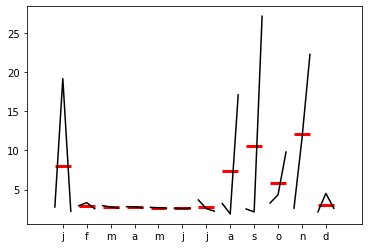

In [297]:
new_month = dataSA["RRP5min"].resample(rule="MS").mean()
month_plot(new_month);
# END OF YEAR PRICES HIGH CUZ OF SUMMERS

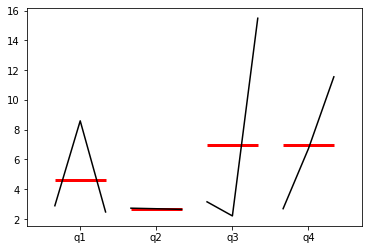

In [300]:
new_quarter = dataSA["RRP5min"].resample(rule="Q").mean()
quarter_plot(new_quarter);

In [301]:
############ ARIMA MODEL ##################
##########################################

In [7]:
from pmdarima import auto_arima

In [ ]:
stepwise_fit = auto_arima(dataSA["RRP5min"][150000:], start_p=0, start_q=0, max_p=6, max_q=6, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=526362.977, Time=2.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=521196.966, Time=3.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=518499.468, Time=17.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=526360.977, Time=1.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=517648.479, Time=23.73 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=517636.031, Time=33.94 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=518527.580, Time=6.10 sec


/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=517506.173, Time=50.96 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=518181.280, Time=9.11 sec


/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=517500.356, Time=72.79 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=517638.336, Time=13.32 sec


/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=171.33 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=517485.813, Time=94.80 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=517484.578, Time=45.99 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=517565.131, Time=50.24 sec


/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=517339.557, Time=122.34 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=517610.252, Time=45.60 sec


/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/ahsan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
stepwisw_fit.summary()

In [21]:
from statsmodels.tsa.arima_model import ARIMA, ARMA, ARMAResults, ARIMAResults

In [27]:
model = ARIMA(train["RRP5min"], order=(3,1,3))

In [ ]:
rsults = model.fit()

In [ ]:
######## TESTING #########

In [52]:
new.index

DatetimeIndex(['2008-01-07 00:00:00', '2008-01-07 00:05:00',
               '2008-01-07 00:10:00', '2008-01-07 00:15:00',
               '2008-01-07 00:20:00', '2008-01-07 00:25:00',
               '2008-01-07 00:30:00', '2008-01-07 00:35:00',
               '2008-01-07 00:40:00', '2008-01-07 00:45:00',
               ...
               '2010-12-06 23:10:00', '2010-12-06 23:15:00',
               '2010-12-06 23:20:00', '2010-12-06 23:25:00',
               '2010-12-06 23:30:00', '2010-12-06 23:35:00',
               '2010-12-06 23:40:00', '2010-12-06 23:45:00',
               '2010-12-06 23:50:00', '2010-12-06 23:55:00'],
              dtype='datetime64[ns]', name='SETTLEMENTDATE', length=306720, freq='5T')

In [66]:
train = dataSA.iloc[:209000]
test = dataSA.iloc[209000:]
train = pd.DataFrame(train["RRP5min"])
test = pd.DataFrame(test["RRP5min"])

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler = MinMaxScaler()

In [67]:
scaler.fit(train)

MinMaxScaler()

In [68]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [69]:
from keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'keras'